#TASK1
- % 수치로 나타난 특성들을 활용하여 선수 분류 모델 학습 및 시각화

## 1. 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
pd.set_option('display.max_columns', None)

In [18]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Fly AI/LCK_2023_SUMMER.csv')

## 2. 데이터 전처리
### Feature Selection
- % 데이터 특성 추출
- GOLD%, Vision Score, VS%, DMG%, KP%


### 포지션 분리


In [19]:
df.head()

,Player,Champion,Role,Level,Kills,Deaths,Assists,KDA,CS,CS in Team's Jungle,CS in Enemy Jungle,CSM,Golds,GPM,GOLD%,Vision Score,Wards placed,Wards destroyed,Control Wards Purchased,Detector Wards Placed,VSPM,WPM,VWPM,WCPM,VS%,Total damage to Champion,Physical Damage,Magic Damage,True Damage,DPM,DMG%,K+A Per Minute,KP%,Solo kills,Double kills,Triple kills,Quadra kills,Penta kills,GD@15,CSD@15,XPD@15,LVLD@15,Objectives Stolen,Damage dealt to turrets,Damage dealt to buildings,Total heal,Total Heals On Teammates,Damage self mitigated,Total Damage Shielded On Teammates,Time ccing others,Total Time CC Dealt,Total damage taken,Total Time Spent Dead,Consumables purchased,Items Purchased,Shutdown bounty collected,Shutdown bounty lost
0,Kiin,Gangplank,TOP,16,2,1,8,10,252,4.0,NaN,8.9,13461,475,23.2%,32.0,14.0,3.0,5.0,5,1.13,0.49,0.18,0.11,13.5%,15214,10060,2645,2509,537,22.9%,0.35,52.6%,NaN,1.0,0.0,0.0,0.0,732.0,23.0,122.0,0.0,0,9719.0,9719,4714.0,0,8267.0,0,5.0,156,13570.0,42,7,22,0,100
1,Cuzz,Viego,JUNGLE,15,8,2,10,9,182,156.0,NaN,6.4,12952,457,22.3%,63.0,6.0,20.0,14.0,4,2.22,0.21,0.49,0.71,26.6%,16015,13084,2333,598,566,24.1%,0.64,94.7%,NaN,1.0,0.0,0.0,0.0,961.0,-6.0,197.0,0.0,0,2852.0,2852,14400.0,0,24001.0,0,12.0,198,23779.0,66,5,24,0,150
2,Bdd,Ahri,MID,15,7,3,10,5.7,219,0.0,NaN,7.7,12578,444,21.7%,28.0,8.0,6.0,5.0,5,0.99,0.28,0.18,0.21,11.8%,20944,2269,12940,5735,740,31.6%,0.60,89.5%,NaN,1.0,0.0,0.0,0.0,394.0,-16.0,-1353.0,-1.0,0,1133.0,1133,4230.0,0,10336.0,0,22.0,77,16177.0,114,7,23,100,500
3,Aiming,Tristana,ADC,15,0,2,13,6.5,264,12.0,NaN,9.3,11753,415,20.2%,42.0,13.0,10.0,5.0,5,1.48,0.46,0.18,0.35,17.7%,10748,9336,1297,115,380,16.2%,0.46,68.4%,NaN,0.0,0.0,0.0,0.0,-487.0,17.0,-170.0,0.0,0,7296.0,7296,3407.0,0,6309.0,0,4.0,53,9404.0,33,6,23,0,0
4,Lehends,Alistar,SUPPORT,12,2,3,11,4.3,30,0.0,NaN,1.1,7317,258,12.6%,72.0,40.0,5.0,14.0,14,2.54,1.41,0.49,0.18,30.4%,3438,157,2751,530,121,5.2%,0.46,68.4%,NaN,0.0,0.0,0.0,0.0,40.0,1.0,518.0,0.0,0,0.0,0,3062.0,1762,16728.0,77,20.0,55,11572.0,49,16,27,0,0


In [20]:
df_percent = df[['Player','Kills','Deaths','Assists','Role','GOLD%','VS%','DMG%','KP%','XPD@15']]

In [21]:
df_percent['GOLD%'] = df_percent['GOLD%'].str.replace('%', '').astype(float)
df_percent['VS%'] = df_percent['VS%'].str.replace('%', '').astype(float)
df_percent['DMG%'] = df_percent['DMG%'].str.replace('%', '').astype(float)
df_percent['KP%'] = df_percent['KP%'].str.replace('%', '').astype(float)

<ipython-input-21-72f3aa1156a1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_percent['GOLD%'] = df_percent['GOLD%'].str.replace('%', '').astype(float)
<ipython-input-21-72f3aa1156a1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_percent['VS%'] = df_percent['VS%'].str.replace('%', '').astype(float)
<ipython-input-21-72f3aa1156a1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [22]:
df_percent.head()

,Player,Kills,Deaths,Assists,Role,GOLD%,VS%,DMG%,KP%,XPD@15
0,Kiin,2,1,8,TOP,23.2,13.5,22.9,52.6,122.0
1,Cuzz,8,2,10,JUNGLE,22.3,26.6,24.1,94.7,197.0
2,Bdd,7,3,10,MID,21.7,11.8,31.6,89.5,-1353.0
3,Aiming,0,2,13,ADC,20.2,17.7,16.2,68.4,-170.0
4,Lehends,2,3,11,SUPPORT,12.6,30.4,5.2,68.4,518.0


In [24]:
df_percent['kda'] = (df_percent['Kills'] + df_percent['Assists']) / (1 + df_percent['Deaths'])

<ipython-input-24-deb4bf65dbfc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_percent['kda'] = (df_percent['Kills'] + df_percent['Assists']) / (1 + df_percent['Deaths'])


In [41]:
df_raw = df_percent[['Player','Role','GOLD%','VS%','DMG%','KP%','XPD@15']]

In [42]:
df_raw.head()

,Player,Role,GOLD%,VS%,DMG%,KP%,XPD@15
0,Kiin,TOP,23.2,13.5,22.9,52.6,122.0
1,Cuzz,JUNGLE,22.3,26.6,24.1,94.7,197.0
2,Bdd,MID,21.7,11.8,31.6,89.5,-1353.0
3,Aiming,ADC,20.2,17.7,16.2,68.4,-170.0
4,Lehends,SUPPORT,12.6,30.4,5.2,68.4,518.0


In [43]:
df_TOP = df_raw.loc[df_raw['Role'] == 'TOP']
df_JUNGLE = df_raw.loc[df_raw['Role'] == 'JUNGLE']
df_MID = df_raw.loc[df_raw['Role'] == 'MID']
df_ADC = df_raw.loc[df_raw['Role'] == 'ADC']
df_SUPPORT = df_raw.loc[df_raw['Role'] == 'SUPPORT']

#2-1. 시각화
- 선수의 모든 데이터를 평균 쳐야함
- 이름, 특성1 평균, 특성2 평균 , 특성3 평균 구조

In [46]:
df_TOP.head()

,Player,Role,GOLD%,VS%,DMG%,KP%,XPD@15
0,Kiin,TOP,23.2,13.5,22.9,52.6,122.0
5,Clear,TOP,19.9,9.0,21.9,36.4,-122.0
10,Clear,TOP,19.5,11.9,21.8,45.5,-744.0
15,PerfecT,TOP,19.5,12.2,19.2,56.5,744.0
20,Rascal,TOP,22.8,12.3,26.6,52.0,944.0


In [47]:
df_TOP['Player'].unique()

array(['Kiin', 'Clear', 'PerfecT', 'Rascal', 'DuDu', 'Morgan', 'Doran',
       'Canna', 'kingen', 'DnDn', 'Zeus', 'Burdol', 'Frog', 'Mihile'],
      dtype=object)

In [48]:
average_stats = df_TOP.groupby('Player',as_index=False).mean()

<ipython-input-48-6893a1db2a05>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  average_stats = df_TOP.groupby('Player',as_index=False).mean()


In [49]:
average_stats

,Player,GOLD%,VS%,DMG%,KP%,XPD@15
0,Burdol,20.534783,11.582609,22.100000,49.304348,-322.043478
1,Canna,20.882500,12.030000,21.887500,51.847500,87.375000
2,Clear,19.582353,10.618750,20.588235,52.676471,88.687500
3,DnDn,20.869767,13.083721,23.865116,44.809302,-366.255814
4,Doran,21.561538,11.035897,23.807692,55.333333,147.897436
5,DuDu,22.184211,11.702632,24.500000,59.052632,134.315789
6,Frog,22.100000,10.300000,11.300000,58.300000,-553.000000
7,Kiin,21.427500,12.407500,23.140000,57.590000,205.325000
8,Mihile,24.200000,11.200000,24.500000,60.000000,553.000000
9,Morgan,22.291111,13.102222,25.068889,52.028889,-60.088889


In [52]:
df = pd.DataFrame(average_stats)
df.set_index("Player", inplace=True)
from sklearn.preprocessing import MinMaxScaler
# Min-Max 스케일링 적용
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=df.columns, index=df.index)

print(scaled_df)

            GOLD%       VS%      DMG%       KP%    XPD@15
Player                                                   
Burdol   0.220167  0.457711  0.784377  0.278040  0.178070
Canna    0.294149  0.617367  0.768944  0.435346  0.493736
Clear    0.017522  0.113749  0.674581  0.486622  0.494747
DnDn     0.291440  0.993398  0.912573  0.000000  0.143982
Doran    0.438625  0.262612  0.908402  0.650962  0.540399
DuDu     0.571109  0.500543  0.958683  0.881019  0.529927
Frog     0.553191  0.000000  0.000000  0.834465  0.000000
Kiin     0.410106  0.752082  0.859910  0.790548  0.584676
Mihile   1.000000  0.321174  0.958683  0.939618  0.852737
Morgan   0.593853  1.000000  1.000000  0.446566  0.380039
PerfecT  0.000000  0.678033  0.573757  0.723126  1.000000
Rascal   0.480455  0.804179  0.826602  0.524328  0.295386
Zeus     0.181864  0.584902  0.864959  1.000000  0.545424
kingen   0.258952  0.952206  0.843010  0.554609  0.465690


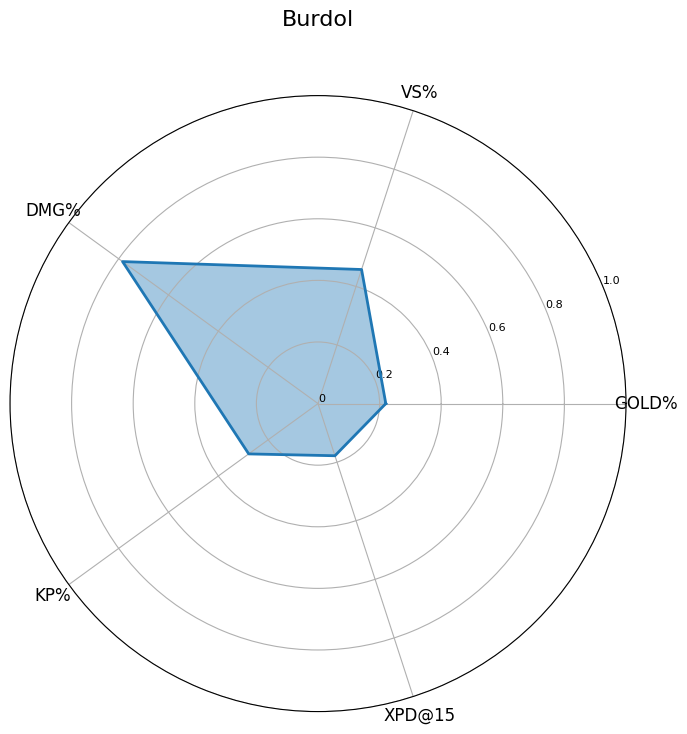

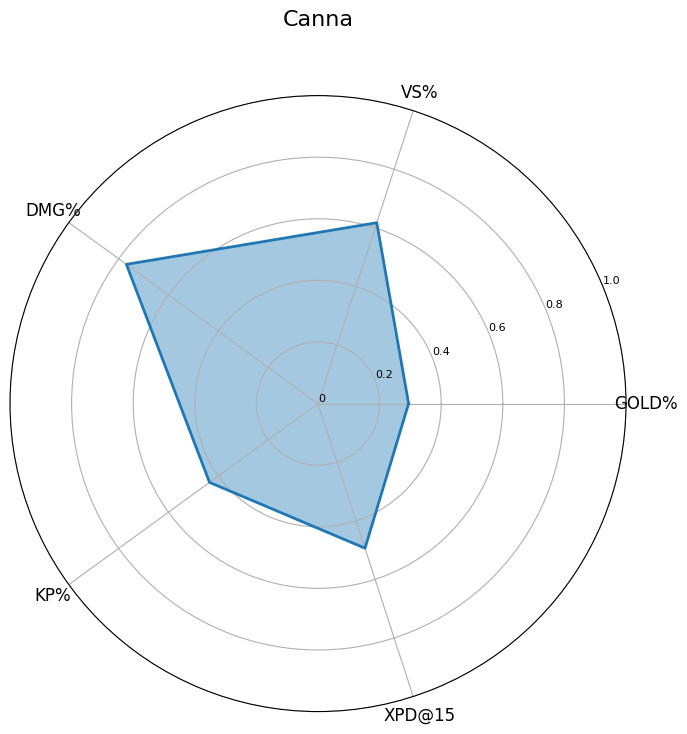

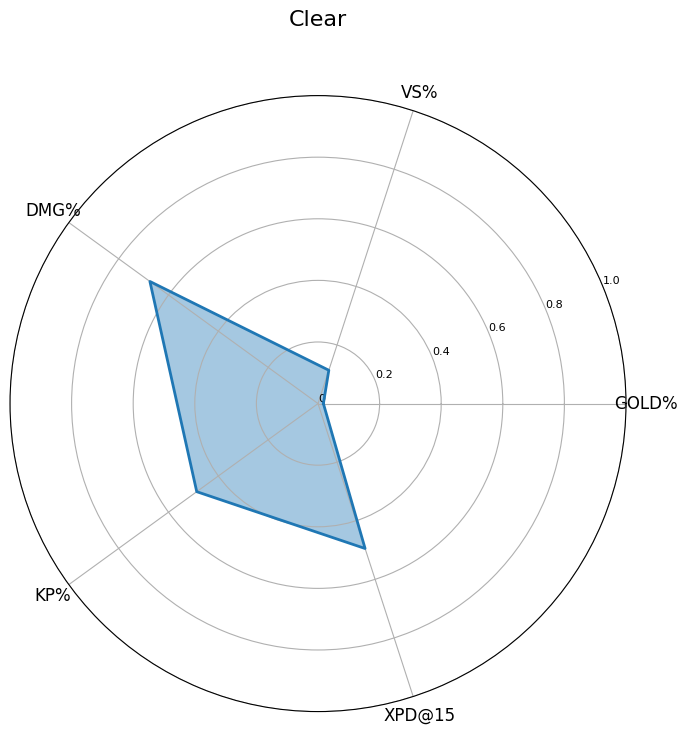

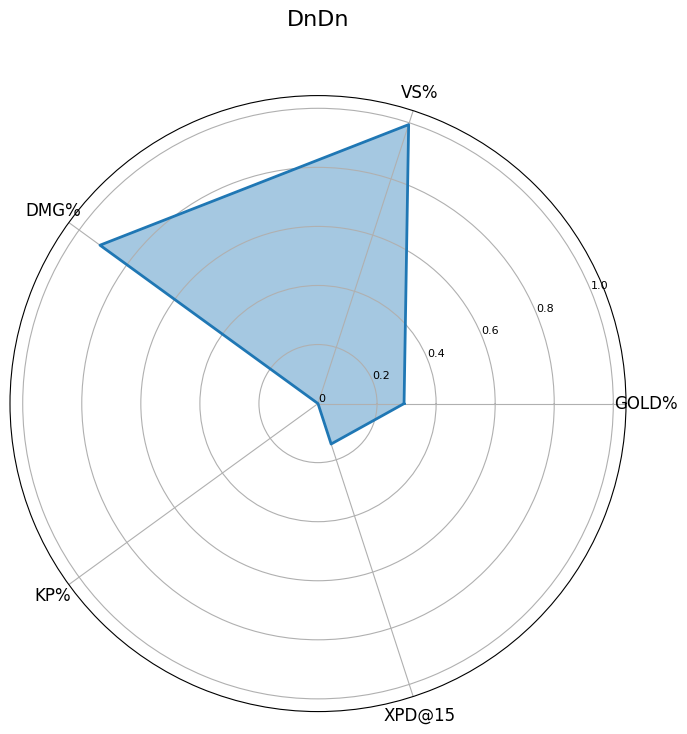

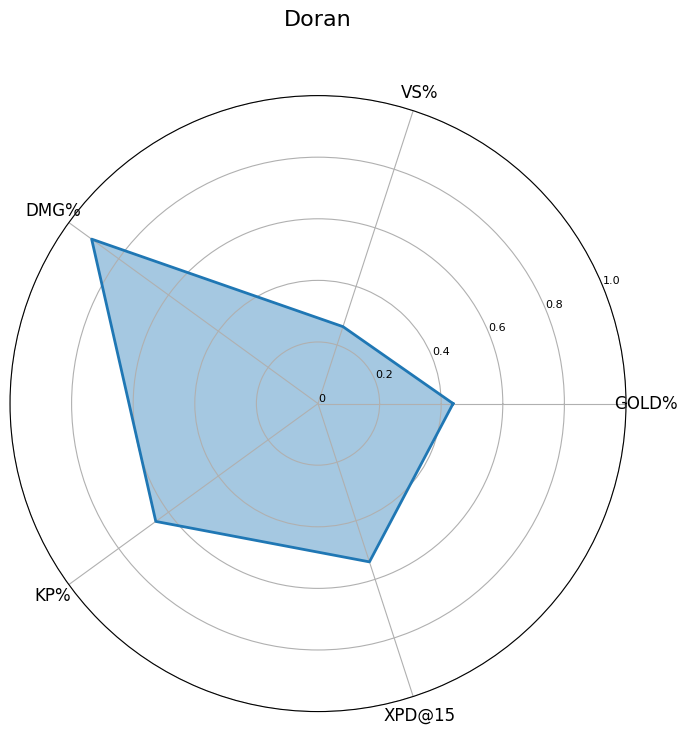

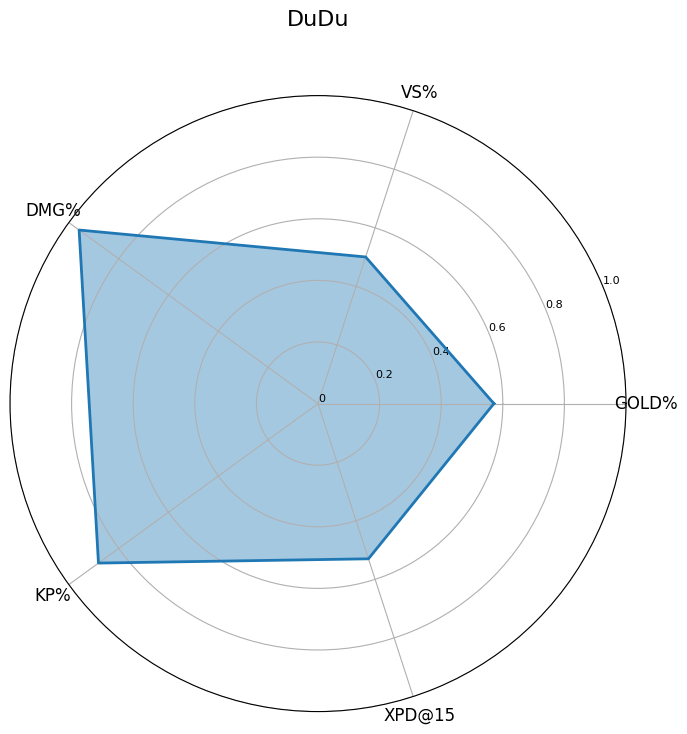

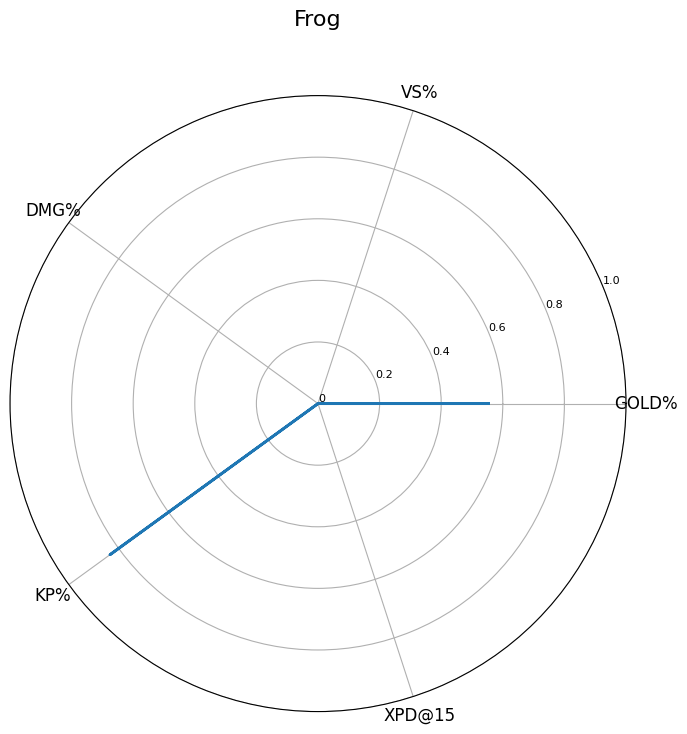

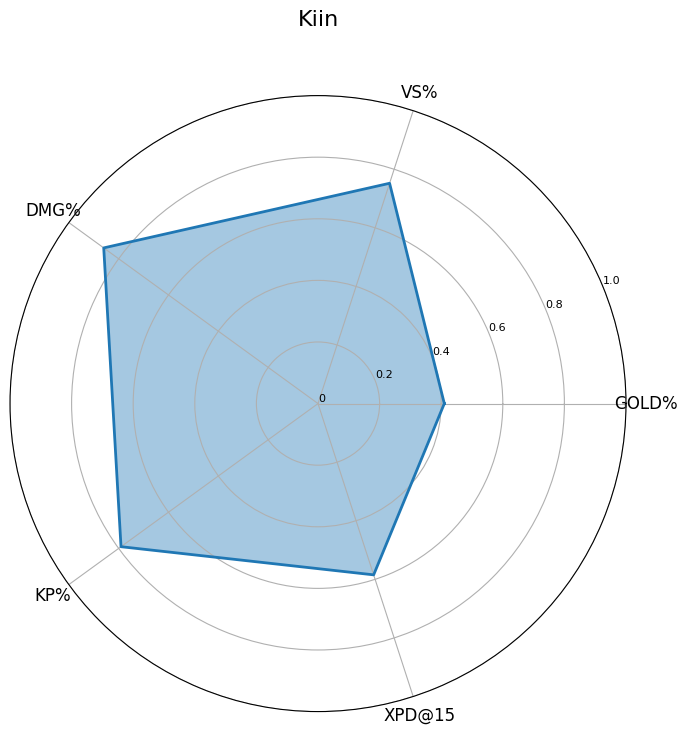

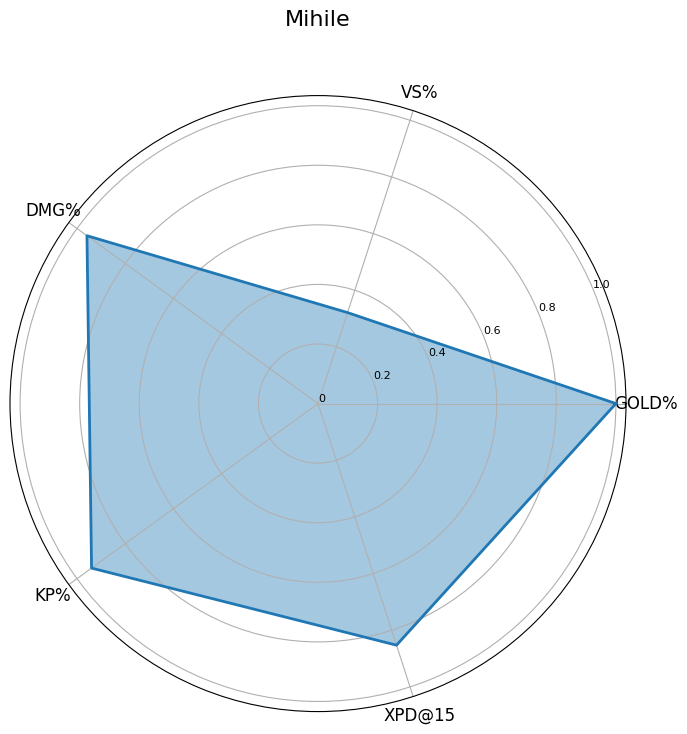

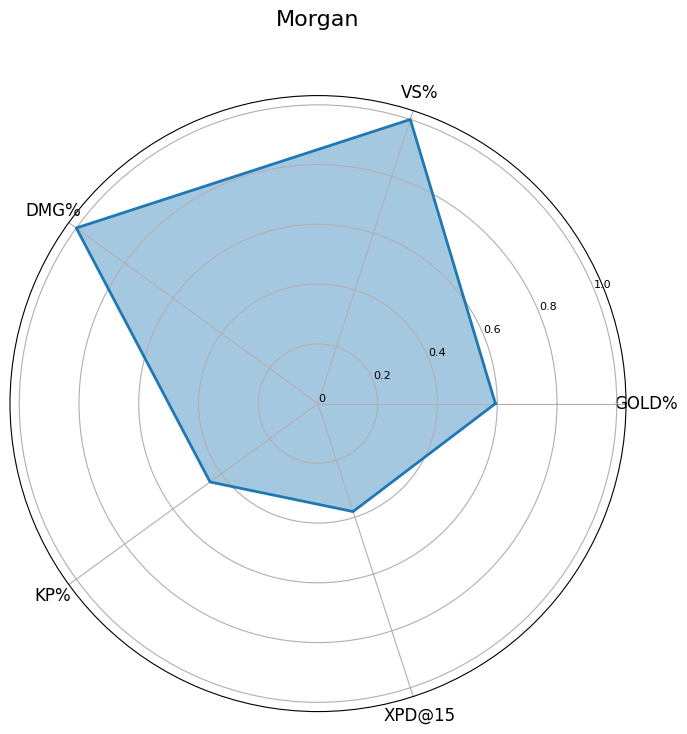

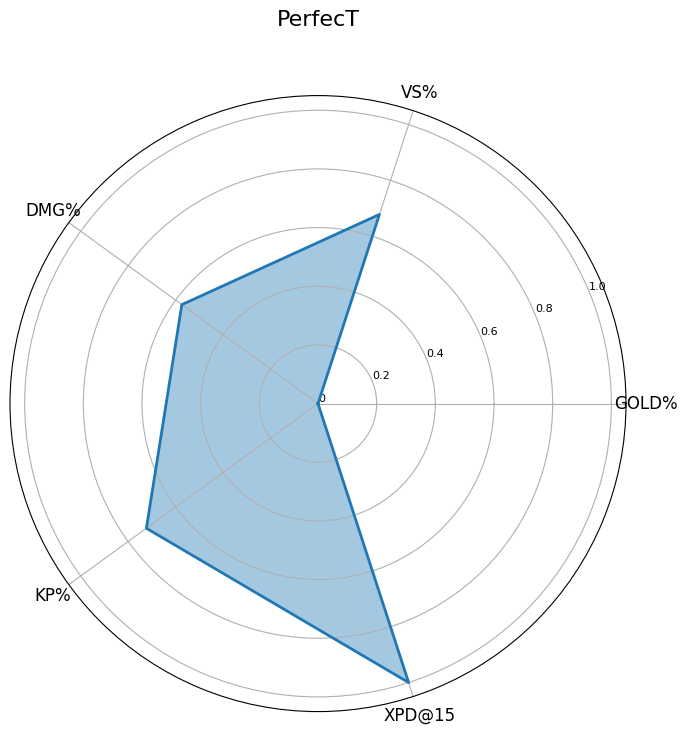

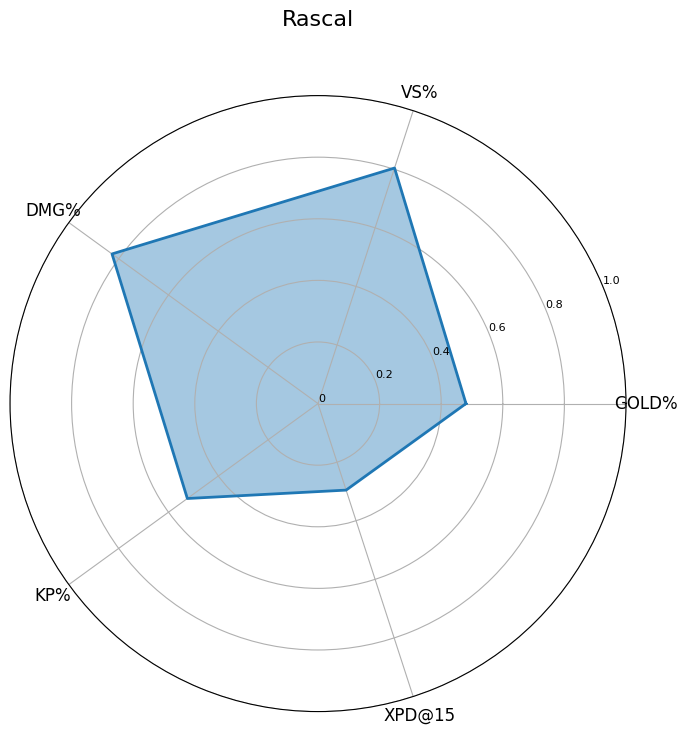

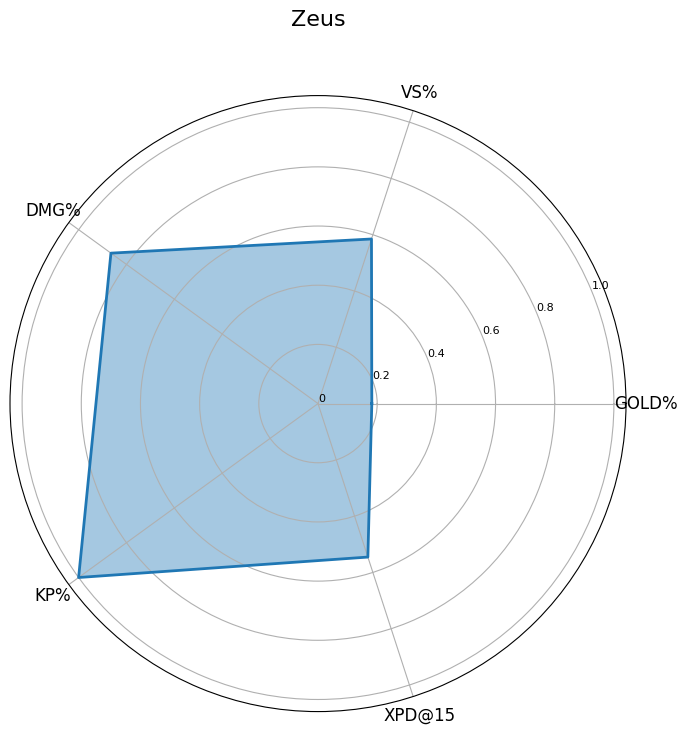

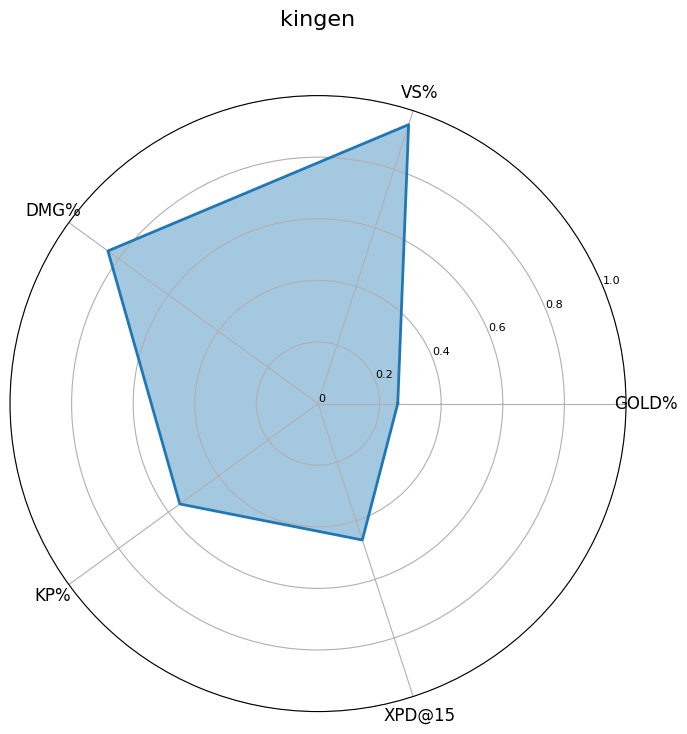

In [53]:
import matplotlib.pyplot as plt


attributes = list(scaled_df.columns)

def plot_radar_chart(player_name, data, attributes):
    values = data.loc[player_name].tolist()
    values += values[:1]

    angles = [n / float(len(attributes)) * 2 * np.pi for n in range(len(attributes))]
    angles += angles[:1]

    plt.figure(figsize=(8, 8))
    ax = plt.subplot(111, polar=True)

    plt.xticks(angles[:-1], attributes, fontsize=12)
    ax.plot(angles, values, linewidth=2, linestyle='solid')
    ax.fill(angles, values, alpha=0.4)
    plt.yticks(np.arange(0, 1.1, 0.2), ["0", "0.2", "0.4", "0.6", "0.8", "1.0"], size=8)
    plt.title(player_name, size=16, y=1.1)
    plt.show()

for player in df.index:
    plot_radar_chart(player, scaled_df, attributes)

# 3. 비슷한 선수 식별
- 유클리드 거리 사용

In [ ]:
input_data = {'GOLD%': 21.0, 'VS%': 12.0, 'DMG%': 23.0, 'KP%': 55.0}

In [ ]:
def calculate_euclidean_distance(row, input_data):
    return np.sqrt(np.sum([(row[col] - input_data[col]) ** 2 for col in input_data.keys()]))

In [ ]:
average_stats['Distance'] = average_stats.apply(calculate_euclidean_distance, axis=1, input_data=input_data)

In [ ]:
similar_player = average_stats[average_stats['Distance'] == average_stats['Distance'].min()]['Player'].iloc[0]
print(f"Most similar player to the input data is: {similar_player}")

Most similar player to the input data is: Doran


In [ ]:
similarity_score = 1 / (1 + average_stats[average_stats['Player'] == similar_player]['Distance'].iloc[0])
print(similarity_score)

0.413711384923736


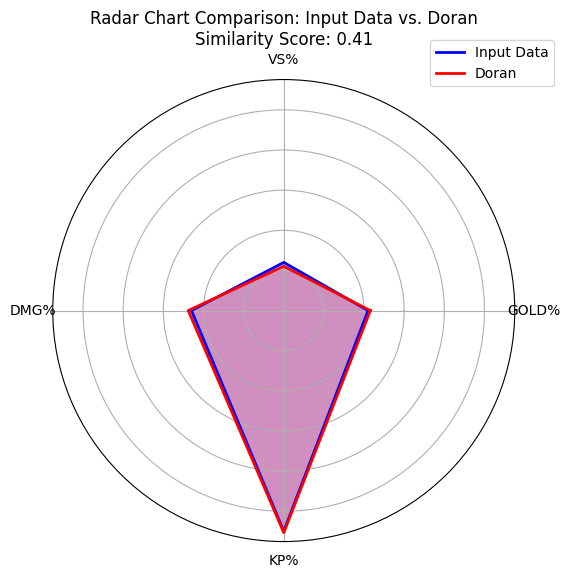

In [ ]:
labels = list(input_data.keys())
num_vars = len(labels)

# 각도 계산
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()

# Radar chart expects the data for each variable to be in a clockwise direction but our angles
# currently start at the x-axis. By rotating the angles by pi/2 radians, we start at the y-axis.
angles += angles[:1]

# Fetching data
similar_player_data = average_stats[average_stats['Player'] == similar_player].iloc[0].to_dict()
input_data_values = list(input_data.values())
similar_player_values = [similar_player_data[label] for label in labels]

# Make sure data wraps around
input_data_values += input_data_values[:1]
similar_player_values += similar_player_values[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, input_data_values, color='blue', linewidth=2, label="Input Data")
ax.fill(angles, input_data_values, color='blue', alpha=0.25)
ax.plot(angles, similar_player_values, color='red', linewidth=2, label=similar_player)
ax.fill(angles, similar_player_values, color='red', alpha=0.25)

# Formatting the chart
ax.set_yticklabels([])
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels)
ax.set_title(f"Radar Chart Comparison: Input Data vs. {similar_player}\nSimilarity Score: {similarity_score:.2f}")
ax.legend(loc="upper right", bbox_to_anchor=(1.1, 1.1))

plt.show()